## Q1: Vector Shapes

In [1]:
!pip install mapclassify #helper package
#import required packages
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Q1a

**Your Text Answer**
There are 5 points, 4 line strings, and 1 polygon present on the map.


### Q1b

In [2]:
## DO NOT MODIFY THE CODE BELOW ##
# list of Points objects in the map
locations = [Point(40,80), Point(55,80), Point(55,70),Point(47.5,65)]

# list of LineString objects in the map
lines = [LineString([Point(55,90), Point(55, 70), Point(47.5,65), Point(40, 70), Point(40,90)]),
        LineString([Point(55,80),Point(65,80)]),
        LineString([Point(30,70), Point(65,70)])]

## END OF DO NOT MODIFY ##

# The Point object in map that is missing in the above list
## YOU CODE GOES HERE ##
missing_location = [Point(40,70)] # Spadina station was missing

# The LineString object in map that is missing in the above list
## YOU CODE GOES HERE #
missing_line = [LineString([Point(30,65),Point(65,65)])] # Go-Train was missing

# The properties of the LineString
## YOU CODE GOES HERE ##
missing_line_properties = 'Train' # the missing line had property "Train"

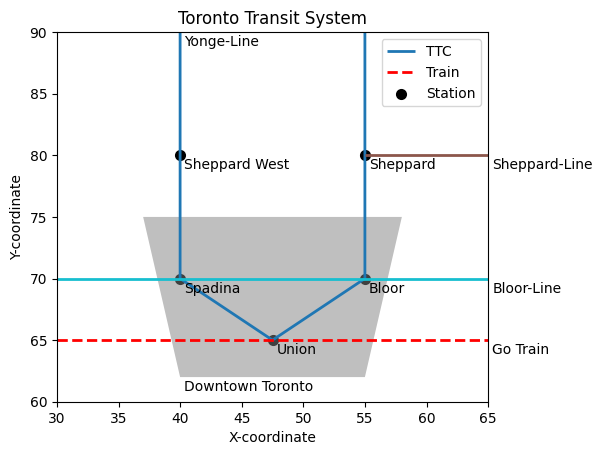

In [3]:
# run the following code to plot the map
## DO NOT MODIFY THE FOLLOWING CODE ##
locations = [Point(40,80)] + missing_location + [Point(55,80), Point(55,70),Point(47.5,65)]
lines = [lines[0]] + missing_line + [lines[1], lines[2]]
locations_name = ['Sheppard West', 'Spadina', 'Sheppard','Bloor', 'Union']
# List of location properties
location_properties = ['Station' for i in range(len(locations))]
# List of line names
lines_name = ['Yonge-Line', 'Go Train', 'Sheppard-Line', 'Bloor-Line']
# List of line properties
line_properties = ['TTC', missing_line_properties, 'TTC', 'TTC']
# Ploygon
polygon = [Polygon([Point(40,62), Point(55, 62), Point(58,75),Point(37, 75)])]
polygon_name = ['Downtown Toronto']
polygon_properties = ['Area']
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'name': lines_name  + locations_name + polygon_name,
                       'properties': line_properties + location_properties + polygon_properties,
                       'geometry': lines + locations + polygon})
def plot_from_gdf(gdf) -> None:
    # given a GeoDataFrame, plot the geometries with different colors based on their properties
    # and annotate the name of the geometries
    for prop, color, linestyle, alpha in [('TTC', 'tab10', '-', 1), ('Train', 'red', '--', 1),
                                          ('Station', 'black', '-', 1), ('Area', 'grey', '-', 0.5)]:
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())

    switch = {
        Point: lambda s: (s.x, s.y),
        # if the shape is a polygon, annotate at the last point
        LineString: lambda s: (s.xy[0][-1], s.xy[1][-1]),
        # if the shape is a polygon, annotate at the first point
        Polygon: lambda s: (s.exterior.coords.xy[0][0], s.exterior.coords.xy[1][0])
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, -10), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    plt.ylim(60,90)
    plt.legend(['TTC', 'Train', 'Station'])
    plt.title('Toronto Transit System')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

plot_from_gdf(gdf)

### Q1c

part 1

In [4]:
### YOUR CODE HERE ###

# defining function to print all locations within a geofence
def get_all_location_within_area(gdf, area) -> None:

    # get the geometry of the area
    if isinstance(area, Polygon):
        geom_area = area
    else:
        geom_area = gdf[gdf['name'] == area].geometry.values[0]

    # iterate through the GeoDataFrame to find all the locations within the area
    for _, row in gdf.iterrows():
        if geom_area.contains(row.geometry) and isinstance(row.geometry, Point):
            print(row['name'], ' is within ', area)

# setting Geofence as Downtown Toronto and printing all locations inside
get_all_location_within_area(gdf,'Downtown Toronto')

Spadina  is within  Downtown Toronto
Bloor  is within  Downtown Toronto
Union  is within  Downtown Toronto


part 2

In [5]:
user_location = [Point(40,80), Point(40, 70), Point(55,80), Point(55,70),Point(47.5,65)]
### YOUR CODE HERE ###

# prints locations within a geofence
def location_within_area(gdf, location, area) -> bool:
     #if given Point, use it, otherwise, get the geometry of the location
    geom_location = location if isinstance(location, Point) else gdf[gdf['name'] == location].geometry.values[0]
    geom_area = gdf[gdf['name'] == area].geometry.values[0]
    return geom_area.contains(geom_location)

# loops through each location in user_location list and determines if each location
# is in downtown toronto geofence area
for location in user_location:
    print(f'Is the location {location} within Downtown Toronto: ',
          location_within_area(gdf, location, 'Downtown Toronto'))

Is the location POINT (40 80) within Downtown Toronto:  False
Is the location POINT (40 70) within Downtown Toronto:  True
Is the location POINT (55 80) within Downtown Toronto:  False
Is the location POINT (55 70) within Downtown Toronto:  True
Is the location POINT (47.5 65) within Downtown Toronto:  True


## Q2: CRS and ShapeFiles

### Q2a

In [6]:
### DO NOT CHANGE THE FOLLOWING CODE ###
#download the Shapefile
!wget https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
!os.mkdir('/content/cb_2018_us_state_500k')
!unzip cb_2018_us_state_500k.zip -d /content/cb_2018_us_state_500k

--2024-04-17 02:23:07--  https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip [following]
--2024-04-17 02:23:07--  https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip’

cb_2018_us_state_50 100%[===================>]   3.15M  --.-KB/s    in 0.1s    

2024-04-17 02:23:08 (29.7 MB/s) - ‘cb_2018_us_state_500k

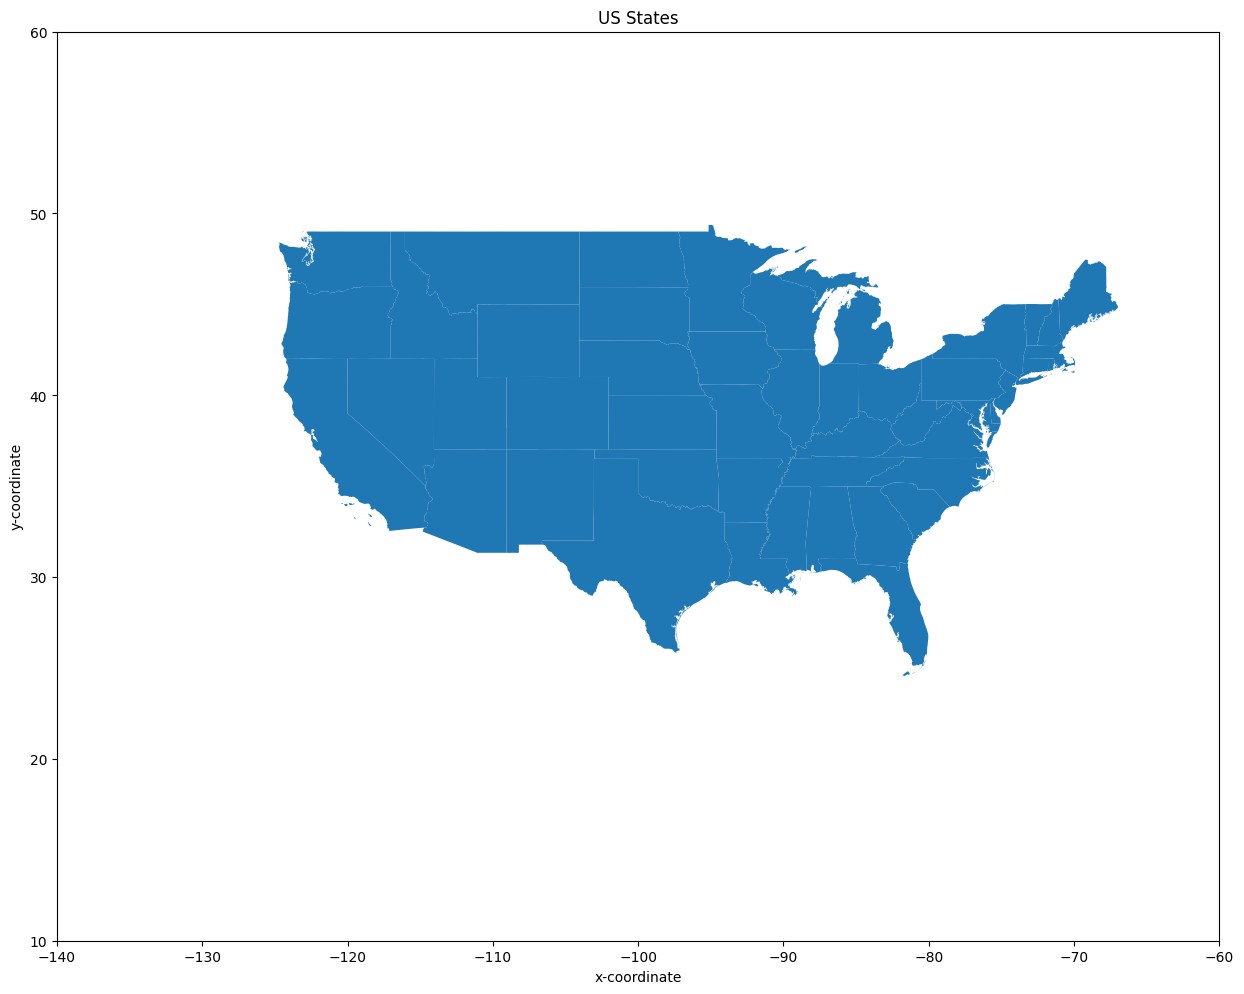

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [7]:
#Q2a - Employ GeoPandas functions to import the ShapeFile and generate a
#      GeoDataFrame named gdf states. The path of the shapefile is provided in
#      the variable shape file location.

#      Afterward,visualize the shapes contained within this ShapeFile on a plot
#      and identify the Coordinate Reference System (CRS) utilized in this
#      ShapeFile. Ensure your plot has a clear title and axis labels.

shape_file_location = 'cb_2018_us_state_500k' # location of the shapefile
### YOUR CODE HERE ###

gdf_states = gpd.read_file(shape_file_location)
# read the entire shapefile folder

### DO NOT CHANGE THE FOLLOWING CODE ###
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
### YOUR CODE HERE ###
# plot the map
gdf_states.plot(figsize=(15, 15))
plt.xlim(-140, -60)
plt.ylim(10, 60)
plt.title('US States')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()


# check CRS
gdf_states.crs

**Your Text Answer:**
The CRS used is CRS:EPSG:4269 which refers to the GCS NAD83

### Q2b

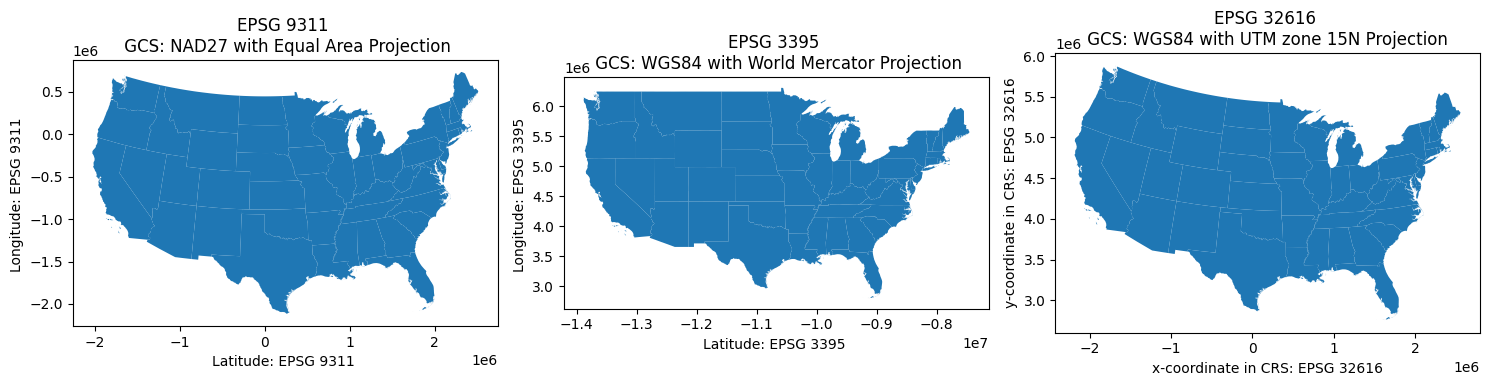

In [8]:
#Q2b - Please examine three different CRSs (or projections) using this ShapeFile.
#      You can use any interested EPSG code in https://spatialreference.org or
#      the EPSG codes given in the lab. Plot these CRSs in a 1x3 subplot with a
#      figure size of (15,5), and determine the most suitable one. Please
#      provide one reason for your choice of CRS over the others. Ensure clear
#      labelling of the CRS names in the plots.

# compliling a list of different CRS projections
crs_options = [
    ("EPSG 9311 \n GCS: NAD27 with Equal Area Projection", gdf_states.to_crs('EPSG:9311')),
    ("EPSG 3395 \n GCS: WGS84 with World Mercator Projection", gdf_states.to_crs('EPSG:3395')),
    ("EPSG 32616 \n GCS: WGS84 with UTM zone 15N Projection ", gdf_states.to_crs("WGS 84 / UTM zone 15N"))
]


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax.flatten()

# Plot each CRS
for i, (title, gdf) in enumerate(crs_options):
    gdf.plot(ax=ax[i],figsize=(5, 5))
    ax[i].set_title(title)
    if i < 2:
      ax[i].set_xlabel('Latitude: ' + title[0:10])
      ax[i].set_ylabel('Longitude: ' + title[0:10])
    else:
      ax[i].set_xlabel('x-coordinate in CRS: ' + title[0:10])
      ax[i].set_ylabel('y-coordinate in CRS: ' + title[0:10])

# Show plot
plt.tight_layout()
plt.show()


### YOUR CODE HERE ###

**Your Text Answer**
I would choose EPSG 9311 due to the minimal area distortion present in each state (since its an Equal Area Projection). This would be necessary to calculate accurate areas and population densities of each state.

### Q2c

In [9]:
### YOUR CODE HERE ###

#number of vector shapes = # rows
print("Number of vector shapes: "+ str(gdf_states['Province_State'].shape[0]))

# getting fifth row of gdf_states
polygon = gdf_states.geometry[4]

print('The Type of the Shape: ', polygon.geom_type)
print('Number of points in the polygon: ', len(polygon.exterior.xy[0]))
print('Area: ', polygon.area)

Number of vector shapes: 49
The Type of the Shape:  Polygon
Number of points in the polygon:  3880
Area:  6.493879726220489


## Question 3: Choropleth By Population

In [10]:
### DO NOT MODIFY THE FOLLOWING CODE ###
# download the data and prepare the data
death_by_state = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
death_by_state = death_by_state.drop(columns = ['UID', 'iso2', 'iso3', 'code3',
                                                      'FIPS', 'Admin2', 'Country_Region',
                                                        'Lat', 'Long_', 'Combined_Key'])
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
death_by_state = death_by_state[death_by_state['Province_State'].isin(gdf_states['Province_State'])]
death_by_state = death_by_state.groupby('Province_State').sum().reset_index()
death_by_month = death_by_state.iloc[:, 2:].T
death_by_month.index = pd.to_datetime(death_by_month.index)
death_by_month = death_by_month.resample('M').last()
death_by_month = death_by_month.T.reset_index(drop=True)
death_by_month[['Province_State','Population']] = death_by_state[['Province_State', 'Population']]
#reorder the columns
death_by_month = death_by_month[['Province_State', 'Population'] + [x for x in death_by_month.columns[0:-2]]]
death_by_month.columns = ['Province_State', 'Population'] + [x.strftime('%m-%Y') for x in death_by_month.columns[2:]]
death_by_month.head()

,Province_State,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Alabama,4903185,0,0,23,272,630,950,1580,2182,...,19755,19891,20048,20422,20558,20652,20737,20870,20932,21032
1,Arizona,7278717,0,0,25,320,907,1645,3694,5029,...,30515,30768,31114,31370,31548,31751,32182,32775,33042,33102
2,Arkansas,3017804,0,0,8,61,133,270,453,797,...,11581,11719,11918,12165,12489,12564,12695,12852,12980,13020
3,California,39512223,0,0,170,2001,4113,5990,9124,12861,...,92163,93409,94794,95863,96793,97435,98544,99988,100726,101159
4,Colorado,5758736,0,0,69,1251,1612,1724,1867,1965,...,12918,13078,13166,13316,13421,13609,13882,14034,14106,14181


### Q3a

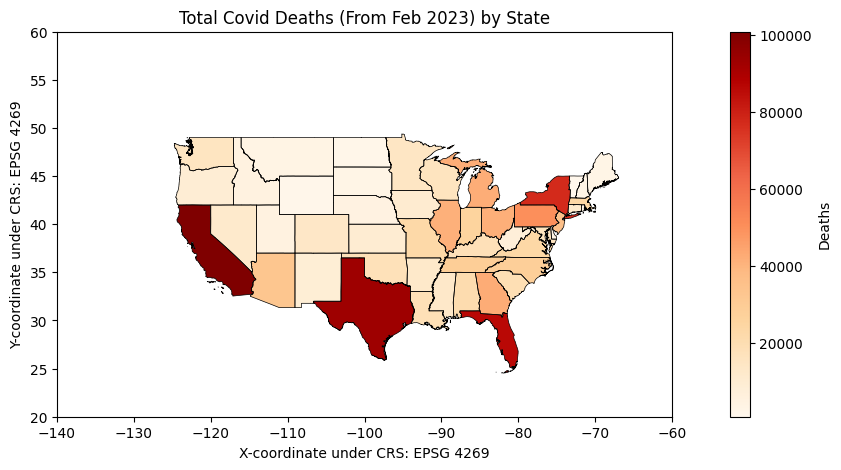

In [11]:
gdf_states.to_crs(epsg=4269, inplace=True)

### YOUR CODE HERE ###

# DataFrame 'death_by_month' contains the dataset for this problem

#  Merging DataFrame 'death_by_month' with GeoDataFrame 'gdf_states'.
# The merged GeoDataFrame should be stored in 'gdf_death'

# Merge the GeoDataFrame with the confirmed cases DataFrame based on the State name
gdf_death = gdf_states[['Province_State', 'geometry']].merge(death_by_month, on='Province_State')

# getting current month data for Feb 2023
current_month = gdf_death[['Province_State','02-2023','geometry','Population']]

# visualize the density
fig,ax  = plt.subplots(1, 1, figsize=(15, 5))

# Plotting chloropleth
current_month.plot(ax = ax,figsize=(10, 5), column='02-2023',
                         legend=True, # include the legend
                         legend_kwds={"label": "Deaths"},# legend style
                         cmap='OrRd') # OrRd colormap

# plot the boundary of the states
gdf_death.boundary.plot(ax = ax,color='k', linewidth=0.5)

plt.title('Total Covid Deaths (From Feb 2023) by State')
plt.xlim(-140, -60)
plt.ylim(20,60)
plt.xlabel('X-coordinate under CRS: EPSG 4269')
plt.ylabel('Y-coordinate under CRS: EPSG 4269')

plt.show()


**Your Text Answer**
The state with the highest cumulative death toll is California, and the state with the lowest seems to be Wyoming.

### Q3b

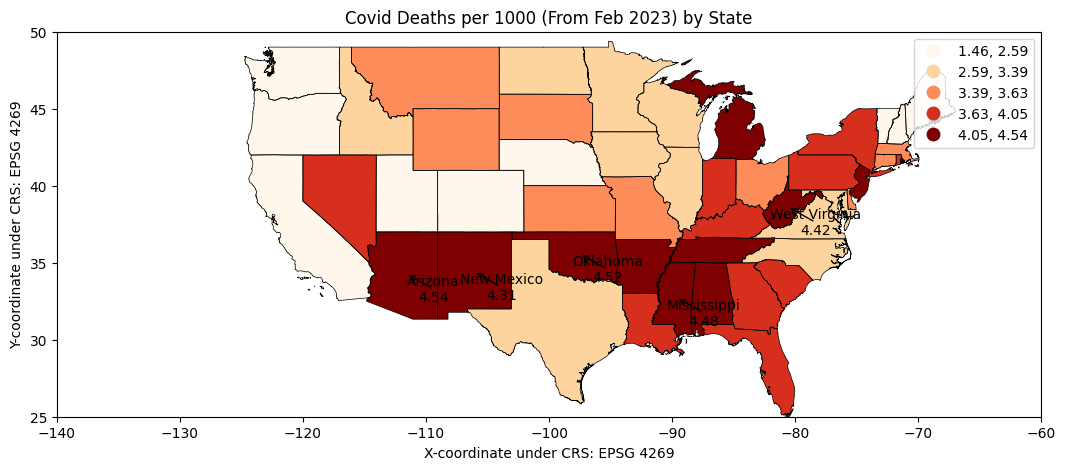

In [12]:
### YOUR CODE HERE ###

#Q3b - plot a choropleth based on the value of February 2023 per 1000 Population

# calculate state deaths per 1000 people
current_month['Density'] = current_month['02-2023'] / current_month['Population'] * 1000

# visualize the density
fig,ax  = plt.subplots(1, 1, figsize=(15, 5))

# Plotting chloropleth
current_month.plot(ax = ax,figsize=(10, 5),
                        column = 'Density',
                         legend=True, # include the legend
                         cmap='OrRd', # OrRd colormap
                        scheme='quantiles')

# plot the boundary of the states
gdf_death.boundary.plot(ax = ax,color='k', linewidth=0.5)

plt.title('Covid Deaths per 1000 (From Feb 2023) by State')
plt.xlim(-140, -60)
plt.ylim(25,50)
plt.xlabel('X-coordinate under CRS: EPSG 4269')
plt.ylabel('Y-coordinate under CRS: EPSG 4269')

# label the top 5 states with the highest deaths per 1000 by its name and value
max_cases_state = current_month.nlargest(5, 'Density') # get the top 2 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Density']):
    ax.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.show()







```
# This is formatted as code
```

**Your Text Answer**
The chloropleth adjusted for population density shows that states like Mississipi and Arizona have an extremely high death toll per 1000. In the previous chloropleth, these states had a moderate/low death toll. I beleive the chloropleth adjusted for population is more suitable for analysis as it accounts for the relationship between population and cumulative death toll. Therefore for a state to have a high death count per 1000, a significant proportion of the population must have died from covid.Therefore using this map would provide a more accurate analysis of covid hotspots in the US by Feb 2023.

## Question 4: Choropleth By Time

In [13]:
### YOUR CODE HERE ###

#Q4a - transform the dataset into new death cases by month, similiar to newly
#      confirmed cases used in the lab.

#plots cholopleths by month
def choropleth_by_month(gdf, year, ax, title) -> None:
    # get year data
    current_year = [col for col in gdf.columns if year in col]
    # plot the data
    for i, month in enumerate(current_year):
        # select the month and calculate the density
        gdf_density = gdf[['Province_State', month, 'geometry',
                           'Population']]
        # calculate the density
        gdf_density['Density'] = gdf_density[month] / (gdf_density['Population']) * 1000
        # plot the data
        gdf_density.plot(ax=ax[i], column='Density',
                         cmap='OrRd',legend=True,legend_kwds={"label": "Deaths per 1000"})

        # plot the boundary of the states
        gdf.boundary.plot(ax = ax[i], color='k', linewidth=0.5)

        # label states with the highest and lowest cases per 100 population
        max_cases_state = gdf_density.nlargest(1, 'Density')
        min_cases_state = gdf_density.nsmallest(1, 'Density')

        for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                                     max_cases_state.geometry.centroid.y,
                                     max_cases_state['Province_State'],
                                     max_cases_state['Density']):
            ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                           textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        for x, y, name, value in zip(min_cases_state.geometry.centroid.x,
                                        min_cases_state.geometry.centroid.y,
                                        min_cases_state['Province_State'],
                                        min_cases_state['Density']):
                ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                            textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        ax[i].set_title(title + f' ({month})')
        ax[i].set_axis_off()
    plt.show()

# gets difference in death cases between months
def get_difference_between_timestamp(gdf) -> gpd.GeoDataFrame:
    # select columns that are not 'Province_State', 'geometry', and 'Population'
    col = [col for col in gdf.columns if col not in ['Province_State', 'geometry', 'Population']]
    gdf_newly_confirmed = gdf[col].diff(axis=1)
    # remove negative values (we only need the newly confirmed cases)
    gdf_newly_confirmed = gdf_newly_confirmed.clip(lower=0)
     # adding the first month's data
    gdf_newly_confirmed.iloc[:,0] = gdf[col[0]]
    # add the 'Province_State', 'geometry', and 'Population' columns
    gdf_newly_confirmed = gdf[['Province_State', 'geometry', 'Population']].join(gdf_newly_confirmed)
    # Every time we use a pandas function, we need to ensure that the result is
    # converted back to a GeoDataFrame if we intend to work with geographic data.
    gdf_newly_confirmed = gpd.GeoDataFrame(gdf_newly_confirmed)

    return gdf_newly_confirmed

# df for new deaths
gdf_new_deaths = get_difference_between_timestamp(gdf_death)

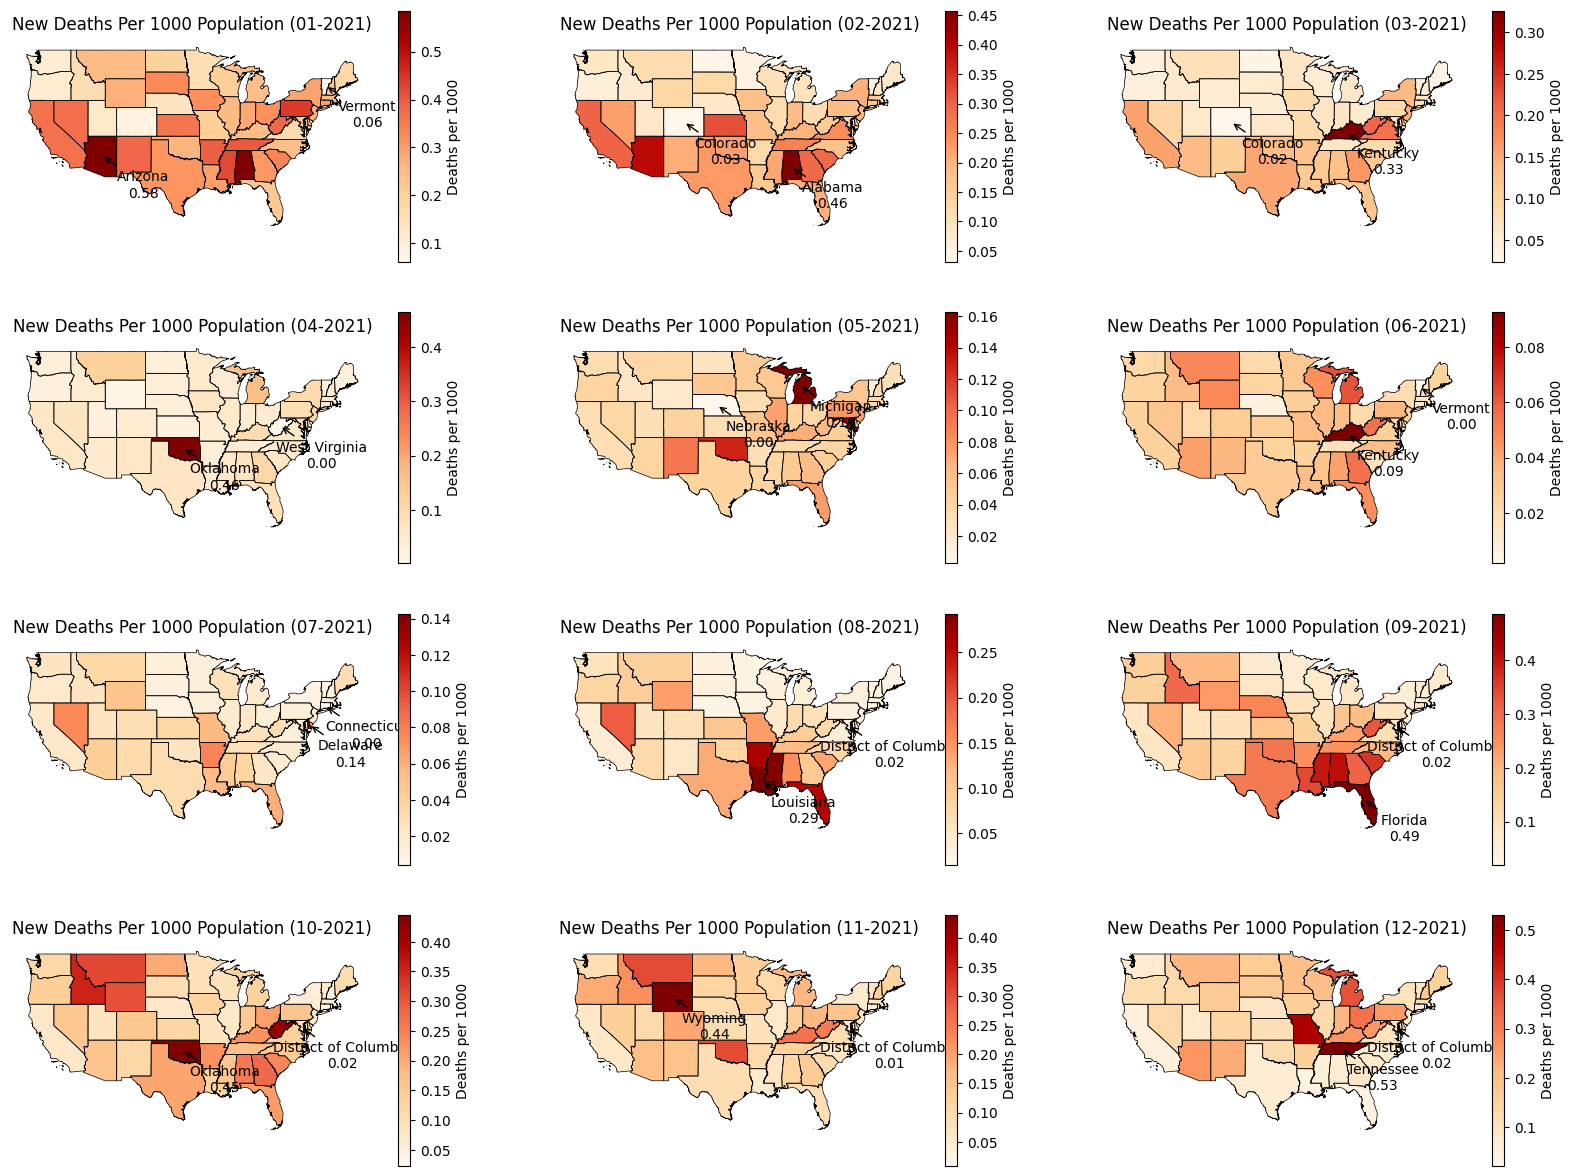

In [14]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
## YOUR CODE HERE ##
# plot the new death cases per 100 population from 01-2021 to 12-2021
choropleth_by_month(gdf_new_deaths, '-2021',ax,
                    title='New Deaths Per 1000 Population')

**Your Text Answer**
It seems that initially, Arizona was the major covid hotspot (had the highest number of new cases) in the US during 2021 but near the middle of 2021, Arizona had a very low number of new cases and south-east states like Kentucky, Louisina and Florida had a high number of new cases. Near the end of 2021, most South-east states had a low number of new cases and central states like Oklahoma, Wyoming and Tennesse had a lot of new cases.

### Q4b

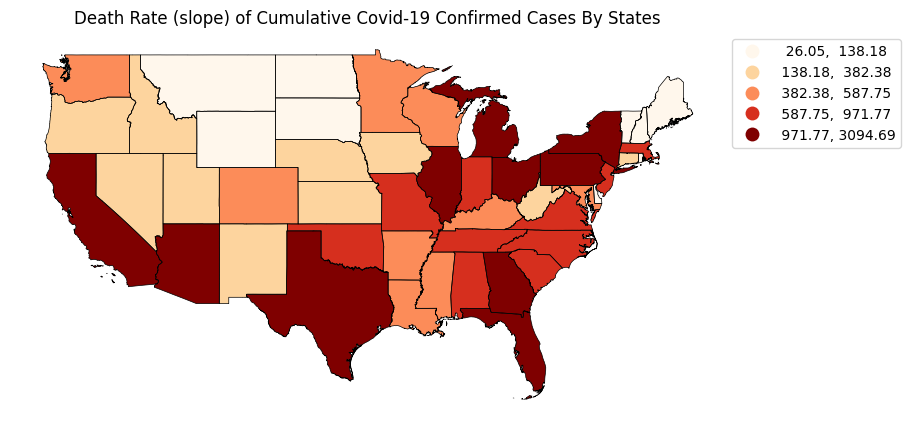

In [15]:
### YOUR CODE HERE ###

#First, fit each sample with a simple linear regression

def linear_regression(sample):
    x = range(len(sample))
    y = sample
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    # Calculate the slope (m) and intercept (b) of the regression line
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = sum((xi - mean_x) ** 2 for xi in x)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return slope, intercept

gdf_death_rate = gdf_death.copy()
col = [col for col in gdf_death_rate.columns if col not in ['Province_State', 'geometry', 'Population']]
gdf_death_rate['slope'] = gdf_death_rate.apply(lambda x: linear_regression(x[col])[0], axis=1)


# use the fitted line’s slope of each sample to create a choropleth.
gdf_death_rate.plot(figsize=(10, 5), column='slope', cmap='OrRd',
                       legend=True,scheme='quantiles',
                         legend_kwds={"bbox_to_anchor": (1, 1),
                                      'loc': 'upper left'})
gdf_death_rate.boundary.plot(color='k', linewidth=0.5,ax = plt.gca())

plt.title('Death Rate (slope) of Cumulative Covid-19 Confirmed Cases By States')
plt.axis('off')
plt.show()

# Ensure you provide a proper title and legends.

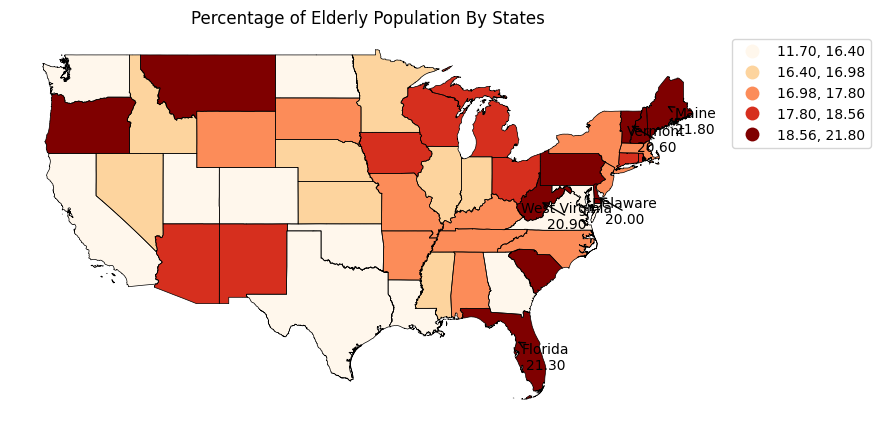

In [16]:
### DO NOT MODIFY ###
# run the code the plot the precentage of population aged 65+ by states choropleth
elder_population = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/elder_population.csv')[['State','Population Ages 65+ (percent of state population)']]
elder_population.columns = ['Province_State', 'Elderly']
# read the shapefile
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
gdf_elder = gdf_states.merge(elder_population)
gdf_elder.plot(column='Elderly', cmap='OrRd', legend=True, figsize=(10, 5), scheme='quantiles',
               legend_kwds={"bbox_to_anchor": (1, 1),'loc': 'upper left'})
gdf_elder.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)
# label the top 5 states with precentage of elderly population
max_cases_state = gdf_elder.nlargest(5, 'Elderly') # get the top 5 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Elderly']):
    plt.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Percentage of Elderly Population By States')
plt.axis('off')
plt.show()


**Your Text Answer**

Florida is a good example of this claim since it has a large proportion of elderly in its population and also has a high death rate. Texas is not a good example of this claim since it has a low proportion of elderly in its population but also a high death rate.